首先生成一个复杂度极低并且特别简单的图, 然后以p的概率进行变化, 
选择图 2-Clique Network

In [8]:
from GraphComplex import*
from scipy.stats import entropy
from KolmogorovComplexity import *
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
from copy import copy
import numpy as np

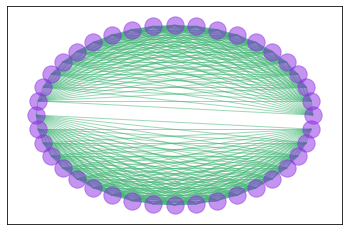

The adajacent matrix entropy of this Graph is:  0.6931440555566901
The outdegrees entropy of this Graph is:  0.1985152433458726
The Kolmogorov Complexity of this Graph is:  50.0


In [9]:
# 2-Clique Network
# 生成邻接矩阵的代码

N = 40 # 节点的数量

# 返回一个表示degreeSequenceGenerator的邻接矩阵
def _2_cliqueNetworkGenerator(verN):
    
    adj_matrix = np.zeros((verN, verN), dtype=int) # 初始化邻接矩阵

    for i in range(verN // 2):
        for j in range(verN // 2):
            adj_matrix[i][j] = 1
            adj_matrix[j][i] = 1
    for i in range(verN // 2, verN):
        for j in range(verN // 2, verN):
            adj_matrix[i][j] = 1
            adj_matrix[j][i] = 1
    adj_matrix[verN // 2 - 1][verN // 2] = 1
    adj_matrix[verN // 2][verN // 2 - 1] = 1
    return adj_matrix


Clique2_Matrix = _2_cliqueNetworkGenerator(verN=N)


G = adj_matrix2nxGraph(Clique2_Matrix)


# 绘制图
nx.draw_networkx(G,pos=nx.circular_layout(G),with_labels=True,alpha=0.5,node_color='blueviolet',node_shape='o',
                 linewidths=1,
                 width=1 , edge_color='mediumseagreen',style='-',
                 font_size=1,font_color='blueviolet',font_family='SimHei')
plt.show()

print('The adajacent matrix entropy of this Graph is: ', calAdj_matrixEntropy(Clique2_Matrix))
print('The outdegrees entropy of this Graph is: ', calcOutdegreesEntropy(Clique2_Matrix))
print('The Kolmogorov Complexity of this Graph is: ', GraphKolmogorovComplexity(Clique2_Matrix))




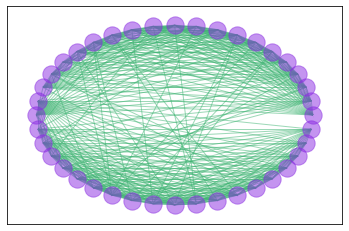

In [10]:
# 接下来根据这个矩阵按照一定的概率发生变化

_init_matrix = Clique2_Matrix



def matrix_trans(init_matrix, p):
    _tmpMatrix = init_matrix.copy()
    n = len(init_matrix)
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                _tmpMatrix[i, j] = 1- _tmpMatrix[i, j]
    return _tmpMatrix




trans_matrix = matrix_trans(_init_matrix, p=0.1)

G = adj_matrix2nxGraph(trans_matrix)
# 绘制图
nx.draw_networkx(G,pos=nx.circular_layout(G),with_labels=True,alpha=0.5,node_color='blueviolet',node_shape='o',
                 linewidths=1,
                 width=1 , edge_color='mediumseagreen',style='-',
                 font_size=1,font_color='blueviolet',font_family='SimHei')
plt.show()



In [11]:
def transformer_model(init_matrix, p_tmp, batch):


    _entropyAdjMatrix = []
    _entropyOutdegrees = []
    _KolmogorovComplexity = []

    for i in range(batch):
        _tmpMatrix = matrix_trans(init_matrix, p_tmp)
        _entropyAdjMatrix.append(calAdj_matrixEntropy(_tmpMatrix))
        _entropyOutdegrees.append(calcOutdegreesEntropy(_tmpMatrix))
        _KolmogorovComplexity.append(GraphKolmogorovComplexity(_tmpMatrix))

    return np.average(_entropyAdjMatrix), np.average(_entropyOutdegrees), np.average(_KolmogorovComplexity)





def transformer(init_matrix, p_begin, p_step, p_size, batch):
    _p_entropyAdjMatrix = []
    _p_entropyOutdegrees = []
    _p_KolmogorovComplexity = []
    _p = []
    _p_tmp = p_begin
    for i in range(p_size):
        if i % 10 == 0:
            print(i / p_size)
        
        _p.append(_p_tmp)
        
        _a_tmp, _b_tmp, _c_tmp = transformer_model(init_matrix, _p_tmp, batch)
        _p_entropyAdjMatrix.append(_a_tmp)
        _p_entropyOutdegrees.append(_b_tmp)
        _p_KolmogorovComplexity.append(_c_tmp)
        _p_tmp += p_step

    return _p, _p_entropyAdjMatrix, _p_entropyOutdegrees, _p_KolmogorovComplexity



data_p, data_p_entropyAdjMatrix, data_p_entropyOutdegrees, data_p_KolmogorovComplexity = (transformer
                                        (init_matrix=Clique2_Matrix, p_begin=0, p_step=0.001, p_size=200, batch=10000))
    


data = {'p': data_p, 'entropyAdjmatrix': data_p_entropyAdjMatrix, 'entropyOutdegrees':data_p_entropyOutdegrees, 
        'KolmogorovComplexity':data_p_KolmogorovComplexity}
# 创建DataFrame对象
df = pd.DataFrame(data)
# 将DataFrame写入.csv文件


writer = pd.ExcelWriter('2-Clique network.xlsx')
df.to_excel(writer, index=False, sheet_name='Sheet1')
writer.save()



0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
